In [1]:
import csv
import datetime
from operator import sub
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn import preprocessing, ensemble

ref - https://www.kaggle.com/c/santander-product-recommendation/forums/t/25579/when-less-is-more

Xgb - https://www.kaggle.com/alexxanderlarko/santander-product-recommendation/xgb-pyt-2211ver2
I have used this xgb as the base for my model & implemented it on my own using below script. It gives me correct numbers but I am stuck at creating 46K records out of 36.7K customers

In [2]:
dtype_list = {'ind_cco_fin_ult1': 'int', 'ind_deme_fin_ult1': 'int', 'ind_aval_fin_ult1': 'int', 'ind_valo_fin_ult1': 'int', 'ind_reca_fin_ult1': 'int', 'ind_ctju_fin_ult1': 'int', 'ind_cder_fin_ult1': 'int', 'ind_plan_fin_ult1': 'int', 'ind_fond_fin_ult1': 'int', 'ind_hip_fin_ult1': 'int', 'ind_pres_fin_ult1': 'int', 'ind_nomina_ult1': 'int', 'ind_cno_fin_ult1': 'int', 'ncodpers': 'int64', 'ind_ctpp_fin_ult1': 'int', 'ind_ahor_fin_ult1': 'int', 'ind_dela_fin_ult1': 'int', 'ind_ecue_fin_ult1': 'int', 'ind_nom_pens_ult1': 'int', 'ind_recibo_ult1': 'int', 'ind_deco_fin_ult1': 'int', 'ind_tjcr_fin_ult1': 'int', 'ind_ctop_fin_ult1': 'int', 'ind_viv_fin_ult1': 'int', 'ind_ctma_fin_ult1': 'int'}

train = pd.read_csv("../Capstone Project/Raw data/train_ver2.csv", na_values=['NA', 'NaN'])
train.dtypes

/Users/ipm/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

In [3]:
#Convert date to datetime & Select May and June-15 data 
train["fecha_dato"] = pd.to_datetime(train["fecha_dato"])
train_Jun15 = train.loc[(train["fecha_dato"] == '2015-05-28') | (train["fecha_dato"] == '2015-06-28')]

#Keep only required columns
cols_in = ['fecha_dato', 'ncodpers', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1','ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1','ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1','ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1','ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1','ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1','ind_nomina_ult1',   'ind_nom_pens_ult1', 'ind_recibo_ult1']
train_Jun15 = train_Jun15.loc[:,cols_in]

In [4]:
train_Jun15.head()

,fecha_dato,ncodpers,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
2512427,2015-05-28,1061260,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
2512428,2015-05-28,1061283,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
2512429,2015-05-28,1061284,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
2512430,2015-05-28,1061336,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
2512431,2015-05-28,1061286,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [5]:
#Get month_ID from fetch_dato & drop fetcha dato
train_Jun15["Month_ID"] = train_Jun15["fecha_dato"].dt.month
train_Jun15.drop("fecha_dato", inplace=True, axis=1)

In [6]:
train_Jun15.shape

(1264067, 26)

In [7]:
target = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1','ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1','ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1','ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1','ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1','ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1','ind_nomina_ult1',   'ind_nom_pens_ult1', 'ind_recibo_ult1']
print len(target)
#Melt the data and create data which has only customer_code, Month_id, product and flag
#Always try to use melt as it's far faster than pivot tables
train2 = pd.melt(train_Jun15,id_vars=["ncodpers", "Month_ID"], value_vars=target,var_name="Product", value_name="Product_flag" )
train2.head()

24


,ncodpers,Month_ID,Product,Product_flag
0,1061260,5,ind_ahor_fin_ult1,0.0
1,1061283,5,ind_ahor_fin_ult1,0.0
2,1061284,5,ind_ahor_fin_ult1,0.0
3,1061336,5,ind_ahor_fin_ult1,0.0
4,1061286,5,ind_ahor_fin_ult1,0.0


In [8]:
train2 = train2.loc[train2["Product_flag"] == 1.0]
train2.shape
train2.head()

,ncodpers,Month_ID,Product,Product_flag
320424,291447,5,ind_ahor_fin_ult1,1.0
321547,275486,5,ind_ahor_fin_ult1,1.0
322273,270730,5,ind_ahor_fin_ult1,1.0
325837,278015,5,ind_ahor_fin_ult1,1.0
329593,315724,5,ind_ahor_fin_ult1,1.0


In [9]:
#Get the data in a format where we can clearly see which product was bought when
train3 = train2.pivot_table(values="Product_flag", index=["ncodpers", "Product"], columns='Month_ID')
train3.head()

Month_ID                      5    6
ncodpers Product                    
15889    ind_cco_fin_ult1   1.0  1.0
         ind_ctpp_fin_ult1  1.0  1.0
         ind_tjcr_fin_ult1  1.0  1.0
         ind_valo_fin_ult1  1.0  1.0
15890    ind_cno_fin_ult1   1.0  1.0

In [10]:
train3.shape

(1165537, 2)

In [11]:
#Rename and chnage the index
train3.reset_index(inplace=True)
train3.rename_axis("ID")
train3.rename(columns={5:"Month_5", 6:"Month_6"}, inplace=True)

#Missing value treatment
train3.Month_5.replace(np.NaN, 0.0, inplace=True)
train3.Month_6.replace(np.NaN, 0.0, inplace=True)
train3.isnull().sum()

Month_ID
ncodpers    0
Product     0
Month_5     0
Month_6     0
dtype: int64

In [12]:
#Total products added in a month
Jun15_additions = train3.ix[(train3["Month_5"] == 0.0) & (train3["Month_6"] == 1.0) ]
Jun15_additions.shape

(45679, 4)

In [13]:
#Total unique customers who bought new product
Jun15_additions["ncodpers"].nunique()
t = Jun15_additions.pivot(index="ncodpers", values="Month_6", columns="Product")
t["ncodpers"] = t.index
t.shape

(36710, 23)

In [14]:
t.reset_index(drop=True,inplace=True)
t.fillna(0,inplace=True)
t["Total_new_prods"] = t.sum(axis=1) - t["ncodpers"]
print t['Total_new_prods'].value_counts()
t.tail()

1.0    29492
2.0     5641
3.0     1412
4.0      156
5.0        9
Name: Total_new_prods, dtype: int64


Product,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_dela_fin_ult1,ind_deme_fin_ult1,...,ind_nomina_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_recibo_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ncodpers,Total_new_prods
36705,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1403803,1.0
36706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1403824,1.0
36707,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1403827,1.0
36708,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1403934,1.0
36709,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1403935,1.0


In [15]:
# Good. We know that we had 36710 customers in May 2015 who bought 45679 products in Jun 2015
# The next step is - to create train_X and train_y to train the model... 

In [16]:
# Here I would like to create my y variables where customer's have bought multiple products.
# e.g. we have 5641 customers who have bought 2 products, so I would like to create 2 rows for these customers

In [17]:
#Unique customers in May 2015 who bought new product in Jun 2015
Jun15_ncodpers = Jun15_additions["ncodpers"].unique()

In [18]:
#We will have some customer's in Jun who bought a product in Jun but were not existing in May. These are totally new customers
May15_x = train.loc[(train["ncodpers"].isin(Jun15_ncodpers)) & ((train["fecha_dato"] == '2015-05-28') | (train["fecha_dato"] == '2015-06-28'))]

In [19]:
May15_x=May15_x.drop_duplicates("ncodpers")

In [20]:
target = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1','ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1','ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1','ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1','ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1','ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1','ind_nomina_ult1',   'ind_nom_pens_ult1', 'ind_recibo_ult1']
May15_x.drop(target,axis=1,inplace=True)

In [21]:
May15_x.shape

(36710, 24)

In [22]:
new = t.merge(May15_x, on="ncodpers",how="inner")

In [23]:
new.shape

(36710, 47)

In [24]:
new.head()

Product,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_dela_fin_ult1,ind_deme_fin_ult1,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,N,N,KAT,N,1.0,28.0,MADRID,1.0,430477.41,01 - TOP
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,N,N,KAT,N,1.0,28.0,MADRID,1.0,183021.75,02 - PARTICULARES
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,N,N,KAT,N,1.0,28.0,MADRID,1.0,175450.05,01 - TOP
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,N,N,KAT,N,1.0,28.0,MADRID,1.0,81005.49,01 - TOP
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,N,N,KAT,N,1.0,28.0,MADRID,1.0,42831.69,02 - PARTICULARES


In [25]:
train1 = train.loc[:,cols_in]

In [26]:
train1["Month_ID"] = train1["fecha_dato"].map(lambda x:x.strftime('%Y-%m'))
train1.drop("fecha_dato", inplace=True, axis=1)

In [27]:
train1.shape

(13647309, 26)

In [28]:
target = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1','ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1','ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1','ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1','ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1','ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1','ind_nomina_ult1',   'ind_nom_pens_ult1', 'ind_recibo_ult1']
print len(target)
#Melt the data and create data which has only customer_code, Month_id, product and flag
#Always try to use melt as it's far faster than pivot tables
train_2 = pd.melt(train1,id_vars=["ncodpers", "Month_ID"], value_vars=target,var_name="Product", value_name="Product_flag" )
train_2.head()

24


,ncodpers,Month_ID,Product,Product_flag
0,1375586,2015-01,ind_ahor_fin_ult1,0.0
1,1050611,2015-01,ind_ahor_fin_ult1,0.0
2,1050612,2015-01,ind_ahor_fin_ult1,0.0
3,1050613,2015-01,ind_ahor_fin_ult1,0.0
4,1050614,2015-01,ind_ahor_fin_ult1,0.0


In [29]:
train_3 = train_2.loc[train_2["Product_flag"] == 1.0]

In [30]:
train_3 = train_3.pivot_table(values="Product_flag", index=["ncodpers", "Product"], columns='Month_ID')
train_3.head()

Month_ID                    2015-01  2015-02  2015-03  2015-04  2015-05  \
ncodpers Product                                                          
15889    ind_cco_fin_ult1       1.0      1.0      1.0      1.0      1.0   
         ind_ctpp_fin_ult1      1.0      1.0      1.0      1.0      1.0   
         ind_tjcr_fin_ult1      1.0      NaN      NaN      NaN      1.0   
         ind_valo_fin_ult1      1.0      1.0      1.0      1.0      1.0   
15890    ind_cno_fin_ult1       1.0      1.0      1.0      1.0      1.0   

Month_ID                    2015-06  2015-07  2015-08  2015-09  2015-10  \
ncodpers Product                                                          
15889    ind_cco_fin_ult1       1.0      1.0      1.0      1.0      1.0   
         ind_ctpp_fin_ult1      1.0      1.0      1.0      1.0      1.0   
         ind_tjcr_fin_ult1      1.0      1.0      NaN      NaN      NaN   
         ind_valo_fin_ult1      1.0      1.0      1.0      1.0      1.0   
15890    ind_cno_fin_ult1       1.0      1.0      1.0      1.0      1.0   

Month_ID                    2015-11  2015-12  2016-01  2016-02  2016-03  \
ncodpers Product                                                          
15889    ind_cco_fin_ult1       1.0      1.0      1.0      1.0      1.0   
         ind_ctpp_fin_ult1      1.0      1.0      1.0      1.0      1.0   
         ind_tjcr_fin_ult1      NaN      1.0      1.0      NaN      1.0   
         ind_valo_fin_ult1      1.0      1.0      1.0      1.0      1.0   
15890    ind_cno_fin_ult1       1.0      1.0      1.0      1.0      1.0   

Month_ID                    2016-04  2016-05  
ncodpers Product                              
15889    ind_cco_fin_ult1       1.0      1.0  
         ind_ctpp_fin_ult1      1.0      1.0  
         ind_tjcr_fin_ult1      NaN      1.0  
         ind_valo_fin_ult1      1.0      1.0  
15890    ind_cno_fin_ult1       1.0      1.0

In [31]:
## Rename and change the index
train_3.reset_index(inplace=True)
train_3.rename_axis("ID")

#Missing value treatment
train_3["2015-01"].replace(np.NaN, 0.0, inplace=True)
train_3["2015-02"].replace(np.NaN, 0.0, inplace=True)
train_3["2015-03"].replace(np.NaN, 0.0, inplace=True)
train_3["2015-04"].replace(np.NaN, 0.0, inplace=True)
train_3["2015-05"].replace(np.NaN, 0.0, inplace=True)
train_3["2015-06"].replace(np.NaN, 0.0, inplace=True)
train_3["2015-07"].replace(np.NaN, 0.0, inplace=True)
train_3["2015-08"].replace(np.NaN, 0.0, inplace=True)
train_3["2015-09"].replace(np.NaN, 0.0, inplace=True)
train_3["2015-10"].replace(np.NaN, 0.0, inplace=True)
train_3["2015-11"].replace(np.NaN, 0.0, inplace=True)
train_3["2015-12"].replace(np.NaN, 0.0, inplace=True)
train_3["2016-01"].replace(np.NaN, 0.0, inplace=True)
train_3["2016-02"].replace(np.NaN, 0.0, inplace=True)
train_3["2016-03"].replace(np.NaN, 0.0, inplace=True)
train_3["2016-04"].replace(np.NaN, 0.0, inplace=True)
train_3["2016-05"].replace(np.NaN, 0.0, inplace=True)
train_3.isnull().sum()

Month_ID
ncodpers    0
Product     0
2015-01     0
2015-02     0
2015-03     0
2015-04     0
2015-05     0
2015-06     0
2015-07     0
2015-08     0
2015-09     0
2015-10     0
2015-11     0
2015-12     0
2016-01     0
2016-02     0
2016-03     0
2016-04     0
2016-05     0
dtype: int64

In [32]:
train_3.head()

Month_ID,ncodpers,Product,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05
0,15889,ind_cco_fin_ult1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,15889,ind_ctpp_fin_ult1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,15889,ind_tjcr_fin_ult1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,15889,ind_valo_fin_ult1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,15890,ind_cno_fin_ult1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [33]:
train_4 = train_3
train_4.ix[(train_4["2015-01"] == 0.0) & (train_4["2015-02"] == 1.0)]

Month_ID,ncodpers,Product,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05
184,15924,ind_tjcr_fin_ult1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187,15925,ind_recibo_ult1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
204,15928,ind_tjcr_fin_ult1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
353,15965,ind_ctop_fin_ult1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
354,15965,ind_ctpp_fin_ult1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
575,16026,ind_tjcr_fin_ult1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
577,16027,ind_cno_fin_ult1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
672,16055,ind_valo_fin_ult1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
817,16149,ind_tjcr_fin_ult1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
841,16162,ind_cco_fin_ult1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [34]:
train_4["Feb15_add"] = (train_4["2015-01"] == 0.0) & (train_4["2015-02"] == 1.0)
train_4["Mar15_add"] = (train_4["2015-02"] == 0.0) & (train_4["2015-03"] == 1.0)
train_4["Apr15_add"] = (train_4["2015-03"] == 0.0) & (train_4["2015-04"] == 1.0)
train_4["May15_add"] = (train_4["2015-04"] == 0.0) & (train_4["2015-05"] == 1.0)
train_4["Jun15_add"] = (train_4["2015-05"] == 0.0) & (train_4["2015-06"] == 1.0)
train_4["Jul15_add"] = (train_4["2015-06"] == 0.0) & (train_4["2015-07"] == 1.0)
train_4["Aug15_add"] = (train_4["2015-07"] == 0.0) & (train_4["2015-08"] == 1.0)
train_4["Sep15_add"] = (train_4["2015-08"] == 0.0) & (train_4["2015-09"] == 1.0)
train_4["Oct15_add"] = (train_4["2015-09"] == 0.0) & (train_4["2015-10"] == 1.0)
train_4["Nov15_add"] = (train_4["2015-10"] == 0.0) & (train_4["2015-11"] == 1.0)
train_4["Dec15_add"] = (train_4["2015-11"] == 0.0) & (train_4["2015-12"] == 1.0)
train_4["Jan16_add"] = (train_4["2015-12"] == 0.0) & (train_4["2016-01"] == 1.0)
train_4["Feb16_add"] = (train_4["2016-01"] == 0.0) & (train_4["2016-02"] == 1.0)
train_4["Mar16_add"] = (train_4["2016-02"] == 0.0) & (train_4["2016-03"] == 1.0)
train_4["Apr16_add"] = (train_4["2016-03"] == 0.0) & (train_4["2016-04"] == 1.0)
train_4["May16_add"] = (train_4["2016-04"] == 0.0) & (train_4["2016-05"] == 1.0)

In [35]:
train_4.drop(["2015-01", "2015-02", "2015-03","2015-04","2015-05","2015-06","2015-07","2015-08", "2015-09", "2015-10", "2015-11", "2015-12", "2016-01", "2016-02", "2016-03", "2016-04", "2016-05"], axis=1,inplace=True)

In [36]:
train_4.head()

Month_ID,ncodpers,Product,Feb15_add,Mar15_add,Apr15_add,May15_add,Jun15_add,Jul15_add,Aug15_add,Sep15_add,Oct15_add,Nov15_add,Dec15_add,Jan16_add,Feb16_add,Mar16_add,Apr16_add,May16_add
0,15889,ind_cco_fin_ult1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,15889,ind_ctpp_fin_ult1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,15889,ind_tjcr_fin_ult1,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True
3,15889,ind_valo_fin_ult1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,15890,ind_cno_fin_ult1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
print "Feb15_added_products:", train_4["Feb15_add"].sum()
print "Mar15_added_products:", train_4["Mar15_add"].sum()
print "Apr15_added_products:", train_4["Apr15_add"].sum()
print "May15_added_products:", train_4["May15_add"].sum()
print "Jun15_added_products:", train_4["Jun15_add"].sum()
print "Jul15_added_products:", train_4["Jul15_add"].sum()
print "Aug15_added_products:", train_4["Aug15_add"].sum()
print "Sep15_added_products:", train_4["Sep15_add"].sum()
print "Oct15_added_products:", train_4["Oct15_add"].sum()
print "Nov15_added_products:", train_4["Nov15_add"].sum()
print "Dec15_added_products:", train_4["Dec15_add"].sum()
print "Jan16_added_products:", train_4["Jan16_add"].sum()
print "Feb16_added_products:", train_4["Feb16_add"].sum()
print "Mar16_added_products:", train_4["Mar16_add"].sum()
print "Apr16_added_products:", train_4["Apr16_add"].sum()
print "May16_added_products:", train_4["May16_add"].sum()

Feb15_added_products: 36218
Mar15_added_products: 36466
Apr15_added_products: 34421
May15_added_products: 30417
Jun15_added_products: 45679
Jul15_added_products: 47316
Aug15_added_products: 40886
Sep15_added_products: 52200
Oct15_added_products: 56476
Nov15_added_products: 44231
Dec15_added_products: 46164
Jan16_added_products: 35393
Feb16_added_products: 52203
Mar16_added_products: 38312
Apr16_added_products: 35229
May16_added_products: 37897


In [38]:
print "Feb15_added_products by Unique Customers:", train_4.groupby("Feb15_add")["ncodpers"].nunique()[True]
print "Mar15_added_products by Unique Customers:", train_4.groupby("Mar15_add")["ncodpers"].nunique()[True]
print "Apr15_added_products by Unique Customers:", train_4.groupby("Apr15_add")["ncodpers"].nunique()[True]
print "May15_added_products by Unique Customers:", train_4.groupby("May15_add")["ncodpers"].nunique()[True]
print "Jun15_added_products by Unique Customers:", train_4.groupby("Jun15_add")["ncodpers"].nunique()[True]
print "Jul15_added_products by Unique Customers:", train_4.groupby("Jul15_add")["ncodpers"].nunique()[True]
print "Aug15_added_products by Unique Customers:", train_4.groupby("Aug15_add")["ncodpers"].nunique()[True]
print "Sep15_added_products by Unique Customers:", train_4.groupby("Sep15_add")["ncodpers"].nunique()[True]
print "Oct15_added_products by Unique Customers:", train_4.groupby("Oct15_add")["ncodpers"].nunique()[True]
print "Nov15_added_products by Unique Customers:", train_4.groupby("Nov15_add")["ncodpers"].nunique()[True]
print "Dec15_added_products by Unique Customers:", train_4.groupby("Dec15_add")["ncodpers"].nunique()[True]
print "Jan16_added_products by Unique Customers:", train_4.groupby("Jan16_add")["ncodpers"].nunique()[True]
print "Feb16_added_products by Unique Customers:", train_4.groupby("Feb16_add")["ncodpers"].nunique()[True]
print "Mar16_added_products by Unique Customers:", train_4.groupby("Mar16_add")["ncodpers"].nunique()[True]
print "Apr16_added_products by Unique Customers:", train_4.groupby("Apr16_add")["ncodpers"].nunique()[True]
print "May16_added_products by Unique Customers:", train_4.groupby("May16_add")["ncodpers"].nunique()[True]

Feb15_added_products by Unique Customers: 28088
Mar15_added_products by Unique Customers: 29124
Apr15_added_products by Unique Customers: 28987
May15_added_products by Unique Customers: 24879
Jun15_added_products by Unique Customers: 36710
Jul15_added_products by Unique Customers: 39324
Aug15_added_products by Unique Customers: 35385
Sep15_added_products by Unique Customers: 44580
Oct15_added_products by Unique Customers: 48507
Nov15_added_products by Unique Customers: 36678
Dec15_added_products by Unique Customers: 37108
Jan16_added_products by Unique Customers: 30331
Feb16_added_products by Unique Customers: 38902
Mar16_added_products by Unique Customers: 30544
Apr16_added_products by Unique Customers: 28707
May16_added_products by Unique Customers: 29717


In [39]:
train_4.groupby("May15_add")["Product"].unique()[True]

array(['ind_tjcr_fin_ult1', 'ind_recibo_ult1', 'ind_fond_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_nom_pens_ult1', 'ind_nomina_ult1', 'ind_dela_fin_ult1',
       'ind_cco_fin_ult1', 'ind_deme_fin_ult1', 'ind_reca_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_valo_fin_ult1', 'ind_pres_fin_ult1',
       'ind_deco_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_cder_fin_ult1', 'ind_viv_fin_ult1',
       'ind_ctju_fin_ult1'], dtype=object)

In [40]:
Jun15_temp = train_4.loc[train_4["Jun15_add"] == True]
Jun15_temp.shape

(45679, 18)

In [41]:
train_4.shape

(1487379, 18)

In [42]:
print "Feb15_added_unique_products:", train_4.groupby("Feb15_add")["Product"].nunique()[True]
print "Mar15_added_unique_products:", train_4.groupby("Mar15_add")["Product"].nunique()[True]
print "Apr15_added_unique_products:", train_4.groupby("Apr15_add")["Product"].nunique()[True]
print "May15_added_unique_products:", train_4.groupby("May15_add")["Product"].nunique()[True]
print "Jun15_added_unique_products:", train_4.groupby("Jun15_add")["Product"].nunique()[True]
print "Jul15_added_unique_products:", train_4.groupby("Jul15_add")["Product"].nunique()[True]
print "Aug15_added_unique_products:", train_4.groupby("Aug15_add")["Product"].nunique()[True]
print "Sep15_added_unique_products:", train_4.groupby("Sep15_add")["Product"].nunique()[True]
print "Oct15_added_unique_products:", train_4.groupby("Oct15_add")["Product"].nunique()[True]
print "Nov15_added_unique_products:", train_4.groupby("Nov15_add")["Product"].nunique()[True]
print "Dec15_added_unique_products:", train_4.groupby("Dec15_add")["Product"].nunique()[True]
print "Jan16_added_unique_products:", train_4.groupby("Jan16_add")["Product"].nunique()[True]
print "Feb16_added_unique_products:", train_4.groupby("Feb16_add")["Product"].nunique()[True]
print "Mar16_added_unique_products:", train_4.groupby("Mar16_add")["Product"].nunique()[True]
print "Apr16_added_unique_products:", train_4.groupby("Apr16_add")["Product"].nunique()[True]
print "May16_added_unique_products:", train_4.groupby("May16_add")["Product"].nunique()[True]

Feb15_added_unique_products: 24
Mar15_added_unique_products: 23
Apr15_added_unique_products: 23
May15_added_unique_products: 22
Jun15_added_unique_products: 22
Jul15_added_unique_products: 22
Aug15_added_unique_products: 22
Sep15_added_unique_products: 22
Oct15_added_unique_products: 22
Nov15_added_unique_products: 22
Dec15_added_unique_products: 21
Jan16_added_unique_products: 21
Feb16_added_unique_products: 21
Mar16_added_unique_products: 20
Apr16_added_unique_products: 20
May16_added_unique_products: 21


In [44]:
print "Feb15_added_unique_products:", sorted(train_4.groupby("Feb15_add")["Product"].unique()[True])
print "\nMar15_added_unique_products:", sorted(train_4.groupby("Mar15_add")["Product"].unique()[True])
print "\nApr15_added_unique_products:", sorted(train_4.groupby("Apr15_add")["Product"].unique()[True])
print "\nMay15_added_unique_products:", sorted(train_4.groupby("May15_add")["Product"].unique()[True])
print "\nJun15_added_unique_products:", sorted(train_4.groupby("Jun15_add")["Product"].unique()[True])
print "\nJul15_added_unique_products:", sorted(train_4.groupby("Jul15_add")["Product"].unique()[True])
print "\nAug15_added_unique_products:", sorted(train_4.groupby("Aug15_add")["Product"].unique()[True])
print "\nSep15_added_unique_products:", sorted(train_4.groupby("Sep15_add")["Product"].unique()[True])
print "\nOct15_added_unique_products:", sorted(train_4.groupby("Oct15_add")["Product"].unique()[True])
print "\nNov15_added_unique_products:", sorted(train_4.groupby("Nov15_add")["Product"].unique()[True])
print "\nDec15_added_unique_products:", sorted(train_4.groupby("Dec15_add")["Product"].unique()[True])
print "\nJan16_added_unique_products:", sorted(train_4.groupby("Jan16_add")["Product"].unique()[True])
print "\nFeb16_added_unique_products:", sorted(train_4.groupby("Feb16_add")["Product"].unique()[True])
print "\nMar16_added_unique_products:", sorted(train_4.groupby("Mar16_add")["Product"].unique()[True])
print "\nApr16_added_unique_products:", sorted(train_4.groupby("Apr16_add")["Product"].unique()[True])
print "\nMay16_added_unique_products:", sorted(train_4.groupby("May16_add")["Product"].unique()[True])

Feb15_added_unique_products: ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_dela_fin_ult1', 'ind_deme_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_nom_pens_ult1', 'ind_nomina_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_recibo_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1']

Mar15_added_unique_products: ['ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_dela_fin_ult1', 'ind_deme_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_nom_pens_ult1', 'ind_nomina_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_recibo_ult1', 'ind_tjcr_fin_ult1', 'ind_valo

In [45]:
prod_summary = pd.concat([train_4.groupby("Product")["May16_add"].sum(), train_4.groupby("Product")["Apr16_add"].sum(),
          train_4.groupby("Product")["Mar16_add"].sum(), train_4.groupby("Product")["Feb16_add"].sum(),
          train_4.groupby("Product")["Jan16_add"].sum(), train_4.groupby("Product")["Dec15_add"].sum(),
          train_4.groupby("Product")["Nov15_add"].sum(), train_4.groupby("Product")["Oct15_add"].sum(),
          train_4.groupby("Product")["Sep15_add"].sum(), train_4.groupby("Product")["Aug15_add"].sum(),
          train_4.groupby("Product")["Jul15_add"].sum(), train_4.groupby("Product")["Jun15_add"].sum(),
          train_4.groupby("Product")["May15_add"].sum(), train_4.groupby("Product")["Apr15_add"].sum(),
          train_4.groupby("Product")["Mar15_add"].sum(), train_4.groupby("Product")["Feb15_add"].sum()], axis=1)

In [46]:
prod_summary

,May16_add,Apr16_add,Mar16_add,Feb16_add,Jan16_add,Dec15_add,Nov15_add,Oct15_add,Sep15_add,Aug15_add,Jul15_add,Jun15_add,May15_add,Apr15_add,Mar15_add,Feb15_add
Product,,,,,,,,,,,,,,,,
ind_ahor_fin_ult1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ind_aval_fin_ult1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
ind_cco_fin_ult1,5511.0,5761.0,7136.0,6546.0,8210.0,12096.0,13034.0,21727.0,20255.0,16559.0,15585.0,9457.0,5355.0,5335.0,5694.0,5831.0
ind_cder_fin_ult1,5.0,5.0,5.0,10.0,12.0,9.0,6.0,3.0,7.0,11.0,11.0,9.0,7.0,12.0,18.0,12.0
ind_cno_fin_ult1,2369.0,2424.0,2459.0,2260.0,2213.0,4033.0,3039.0,2450.0,1811.0,2448.0,2888.0,1934.0,1987.0,2068.0,1852.0,1964.0
ind_ctju_fin_ult1,77.0,77.0,88.0,93.0,89.0,170.0,74.0,74.0,52.0,65.0,79.0,55.0,84.0,69.0,74.0,54.0
ind_ctma_fin_ult1,713.0,854.0,913.0,1061.0,868.0,806.0,823.0,589.0,582.0,347.0,356.0,349.0,308.0,324.0,408.0,409.0
ind_ctop_fin_ult1,226.0,240.0,225.0,217.0,259.0,283.0,209.0,224.0,191.0,231.0,265.0,222.0,298.0,282.0,292.0,261.0
ind_ctpp_fin_ult1,131.0,161.0,131.0,141.0,149.0,155.0,140.0,153.0,122.0,145.0,165.0,154.0,174.0,173.0,167.0,174.0


In [59]:
y = train_4.loc[(train_4["Product"] == 'ind_nom_pens_ult1') | (train_4["Product"] == 'ind_nomina_ult1')]
y.head()

Month_ID,ncodpers,Product,Feb15_add,Mar15_add,Apr15_add,May15_add,Jun15_add,Jul15_add,Aug15_add,Sep15_add,Oct15_add,Nov15_add,Dec15_add,Jan16_add,Feb16_add,Mar16_add,Apr16_add,May16_add
7,15890,ind_nom_pens_ult1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,15890,ind_nomina_ult1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27,15894,ind_nom_pens_ult1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28,15894,ind_nomina_ult1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
51,15897,ind_nom_pens_ult1,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False


In [47]:
prod_summary["May16_May15"] = prod_summary["May16_add"]/(prod_summary["May15_add"])
prod_summary["Jun15_May15"] = prod_summary["Jun15_add"]/(prod_summary["May15_add"])

In [48]:
prod_summary[["May16_add", "May15_add","May16_May15", "Jun15_add","Jun15_May15" ]]

,May16_add,May15_add,May16_May15,Jun15_add,Jun15_May15
Product,,,,,
ind_ahor_fin_ult1,1.0,0.0,inf,0.0,NaN
ind_aval_fin_ult1,0.0,0.0,NaN,0.0,NaN
ind_cco_fin_ult1,5511.0,5355.0,1.029132,9457.0,1.766013
ind_cder_fin_ult1,5.0,7.0,0.714286,9.0,1.285714
ind_cno_fin_ult1,2369.0,1987.0,1.192250,1934.0,0.973327
ind_ctju_fin_ult1,77.0,84.0,0.916667,55.0,0.654762
ind_ctma_fin_ult1,713.0,308.0,2.314935,349.0,1.133117
ind_ctop_fin_ult1,226.0,298.0,0.758389,222.0,0.744966
ind_ctpp_fin_ult1,131.0,174.0,0.752874,154.0,0.885057


ind_dela_fin_ult1 - This product seems to be less popular in 2016. In 2015 1K+ customer's have bought this product whereas in 2016 May, only 46 customers have bought it. 

In [49]:
import matplotlib.pyplot as plt
prod_summary.loc["ind_dela_fin_ult1"].sort_index(ascending=False).plot()
plt.xticks(rotation=90)

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.]),
 <a list of 10 Text xticklabel objects>)

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.]),
 <a list of 10 Text xticklabel objects>)

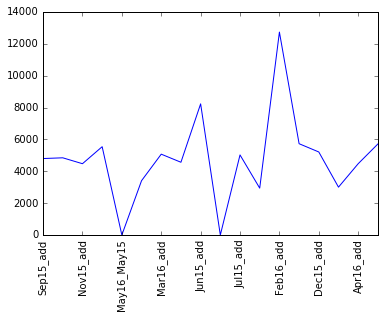

In [50]:
%matplotlib inline 
prod_summary.loc["ind_nom_pens_ult1"].sort_index(ascending=False).plot()
plt.xticks(rotation=90)

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.]),
 <a list of 10 Text xticklabel objects>)

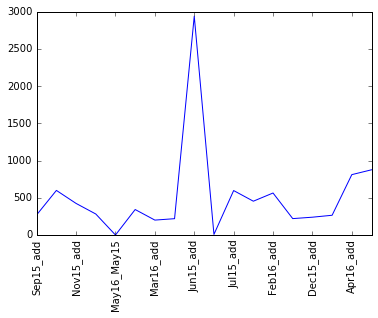

In [51]:
prod_summary.loc["ind_reca_fin_ult1"].sort_index(ascending=False).plot()
plt.xticks(rotation=90)

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.]),
 <a list of 10 Text xticklabel objects>)

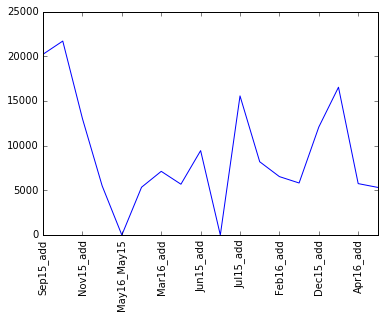

In [52]:
prod_summary.loc["ind_cco_fin_ult1"].sort_index(ascending=False).plot()
plt.xticks(rotation=90)

In [53]:
##All products with very small(<10) customer's buying in a month

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.]),
 <a list of 10 Text xticklabel objects>)

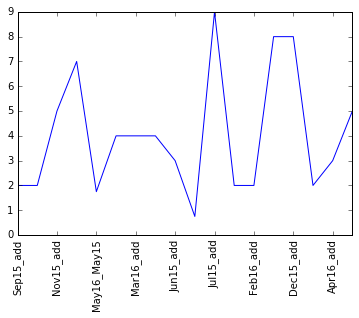

In [54]:
prod_summary.loc["ind_viv_fin_ult1"].sort_index(ascending=False).plot()
plt.xticks(rotation=90)

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.]),
 <a list of 10 Text xticklabel objects>)

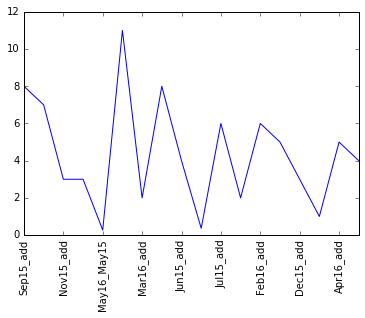

In [55]:
prod_summary.loc["ind_hip_fin_ult1"].sort_index(ascending=False).plot()
plt.xticks(rotation=90)

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.]),
 <a list of 10 Text xticklabel objects>)

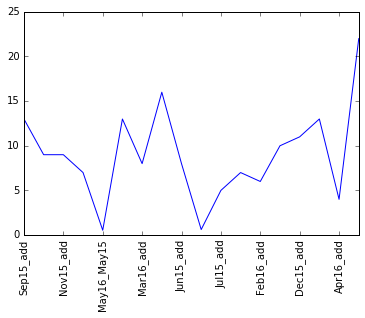

In [56]:
prod_summary.loc["ind_pres_fin_ult1"].sort_index(ascending=False).plot()
plt.xticks(rotation=90)

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.]),
 <a list of 10 Text xticklabel objects>)

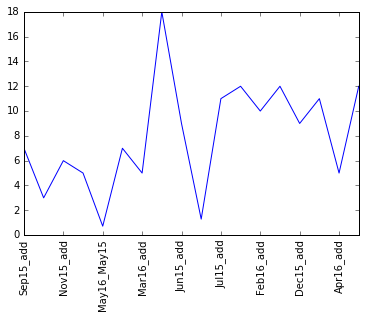

In [57]:
prod_summary.loc["ind_cder_fin_ult1"].sort_index(ascending=False).plot()
plt.xticks(rotation=90)

In [58]:
Jun15_add = train_4[["ncodpers", "Product", "Jun15_add"]]
Jun15_add.drop_duplicates()
Jun15_add = Jun15_add.loc[Jun15_add["Jun15_add"] == True]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(Jun15_add["Product"])
Jun15_add["Product_Enc"] = le.transform(Jun15_add["Product"])
Jun15_add.shape

(45679, 4)

In [59]:
Jun15_add.loc[Jun15_add["ncodpers"] == 15892]

Month_ID,ncodpers,Product,Jun15_add,Product_Enc
13,15892,ind_cco_fin_ult1,True,0


In [60]:
base = train_4.loc[train_4["Jun15_add"] == True][["ncodpers", "Product"]]
base["Jun15_add"] = 1
base.head()

Month_ID,ncodpers,Product,Jun15_add
13,15892,ind_cco_fin_ult1,1
42,15896,ind_cco_fin_ult1,1
51,15897,ind_nom_pens_ult1,1
84,15906,ind_nom_pens_ult1,1
187,15925,ind_recibo_ult1,1


In [61]:
total_new_prod = base.groupby("ncodpers")["Jun15_add"].sum()
total_new_prod["ncodpers"] = total_new_prod.index

In [62]:
base.merge(total_new_prod.to_frame(), left_index=True, right_index=True)
base.rename(columns={'Jun15_add_y': 'New_prod_added'}, inplace=True)

In [63]:
base

Month_ID,ncodpers,Product,Jun15_add
13,15892,ind_cco_fin_ult1,1
42,15896,ind_cco_fin_ult1,1
51,15897,ind_nom_pens_ult1,1
84,15906,ind_nom_pens_ult1,1
187,15925,ind_recibo_ult1,1
194,15927,ind_cco_fin_ult1,1
348,15964,ind_reca_fin_ult1,1
419,15982,ind_nom_pens_ult1,1
420,15982,ind_nomina_ult1,1
572,16026,ind_nom_pens_ult1,1


In [64]:
#train_Jan_jun15.columns

In [65]:
# Lag 1 for all products and segment and age variables

In [66]:
train_May_jun15 = train.loc[(train["fecha_dato"] == '2015-06-28')|(train["fecha_dato"] == '2015-05-28') ]

#Keep only required columns
cols_in = ['fecha_dato', 'age' ,'segmento' ,'ncodpers', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1','ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1','ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1','ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1','ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1','ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1','ind_nomina_ult1',   'ind_nom_pens_ult1', 'ind_recibo_ult1']
train_May_jun15 = train_May_jun15.loc[:,cols_in]

In [67]:
lags_base = pd.merge(train_May_jun15, Jun15_add, how="left", on="ncodpers")

In [68]:
lags_base.loc[lags_base["ncodpers"] == 15982]

,fecha_dato,age,segmento,ncodpers,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,...,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,Product,Jun15_add,Product_Enc
426858,2015-05-28,57,02 - PARTICULARES,15982,0,0,1,0,1,0,...,0,1,0,0,0.0,0.0,1,ind_nom_pens_ult1,True,13.0
426859,2015-05-28,57,02 - PARTICULARES,15982,0,0,1,0,1,0,...,0,1,0,0,0.0,0.0,1,ind_nomina_ult1,True,14.0
1067700,2015-06-28,57,02 - PARTICULARES,15982,0,0,1,0,1,0,...,0,1,0,0,1.0,1.0,1,ind_nom_pens_ult1,True,13.0
1067701,2015-06-28,57,02 - PARTICULARES,15982,0,0,1,0,1,0,...,0,1,0,0,1.0,1.0,1,ind_nomina_ult1,True,14.0


In [69]:
lags_base = lags_base.sort_values(["ncodpers","fecha_dato"], ascending=[True, False])

In [70]:
lag_cols = ['age' ,'segmento','ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1','ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1','ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1','ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1','ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1','ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1','ind_nomina_ult1',   'ind_nom_pens_ult1', 'ind_recibo_ult1']
for col in lag_cols:
    lags_base[col +"_lag1"] = lags_base.groupby("ncodpers")[col].shift(-1).fillna(0)

In [71]:
lags_base = lags_base.ix[lags_base["Product"].notnull()]

In [72]:
lags_base.shape

(87424, 57)

In [73]:
lags_base.drop([
       'segmento', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1',
       'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1', 'Product', 'Jun15_add', 'Product_Enc'],axis=1,inplace=True)

In [74]:
lags_base1 = lags_base.loc[lags_base["fecha_dato"] == '2015-06-28']

In [75]:
lags_base1.shape

(45679, 29)

In [76]:
# Lag 2 for all products and segment and age variables

In [77]:
train_Apr_jun15 = train.loc[(train["fecha_dato"] == '2015-06-28')|(train["fecha_dato"] == '2015-05-28') | (train["fecha_dato"] == '2015-04-28') ]

#Keep only required columns
cols_in = ['fecha_dato', 'age' ,'segmento' ,'ncodpers', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1','ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1','ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1','ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1','ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1','ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1','ind_nomina_ult1',   'ind_nom_pens_ult1', 'ind_recibo_ult1']
train_Apr_jun15 = train_Apr_jun15.loc[:,cols_in]

In [78]:
lags_base = pd.merge(train_Apr_jun15,Jun15_add,how="left", on="ncodpers")

In [79]:
lags_base = lags_base.sort_values(["ncodpers","fecha_dato"], ascending=[True, False])

In [80]:
lag_cols = ['age' ,'segmento','ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1','ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1','ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1','ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1','ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1','ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1','ind_nomina_ult1',   'ind_nom_pens_ult1', 'ind_recibo_ult1']
for col in lag_cols:
    lags_base[col +"_lag2"] = lags_base.groupby("ncodpers")[col].shift(-2).fillna(0)

In [81]:
lags_base = lags_base.ix[lags_base["Product"].notnull()]

In [82]:
lags_base.drop(['age',
       'segmento', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1',
       'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1', 'Product', 'Jun15_add', 'Product_Enc'],axis=1,inplace=True)

In [83]:
lags_base2 = lags_base.loc[lags_base["fecha_dato"] == '2015-06-28']

In [84]:
lags_base2.shape

(45679, 28)

In [85]:
t = pd.merge(lags_base1, lags_base2, on= ["ncodpers", "fecha_dato"])
t.shape

(67485, 55)

In [86]:
# Lag 3 for all products and segment and age variables

In [87]:
train_Mar_jun15 = train.loc[(train["fecha_dato"] == '2015-06-28')|(train["fecha_dato"] == '2015-05-28') | (train["fecha_dato"] == '2015-04-28') | (train["fecha_dato"] == '2015-03-28')]

#Keep only required columns
cols_in = ['fecha_dato', 'age' ,'segmento' ,'ncodpers', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1','ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1','ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1','ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1','ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1','ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1','ind_nomina_ult1',   'ind_nom_pens_ult1', 'ind_recibo_ult1']
train_Mar_jun15 = train_Mar_jun15.loc[:,cols_in]

In [88]:
lags_base = pd.merge(train_Mar_jun15,Jun15_add,how="left", on="ncodpers")

In [89]:
lags_base = lags_base.sort_values(["ncodpers","fecha_dato"], ascending=[True, False])

In [90]:
lag_cols = ['age' ,'segmento','ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1','ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1','ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1','ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1','ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1','ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1','ind_nomina_ult1',   'ind_nom_pens_ult1', 'ind_recibo_ult1']
for col in lag_cols:
    lags_base[col +"_lag3"] = lags_base.groupby("ncodpers")[col].shift(-3).fillna(0)

In [91]:
lags_base = lags_base.ix[lags_base["Product"].notnull()]

In [92]:
lags_base.drop(['age',
       'segmento', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1',
       'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1', 'Product', 'Jun15_add', 'Product_Enc'],axis=1,inplace=True)

In [93]:
lags_base3 = lags_base.loc[lags_base["fecha_dato"] == '2015-06-28']

In [94]:
lags_base3.shape

(45679, 28)

In [95]:
t = pd.merge(t, lags_base3, on= ["ncodpers", "fecha_dato"])
t.columns.values

array(['fecha_dato', 'age', 'ncodpers', 'age_lag1', 'segmento_lag1',
       'ind_ahor_fin_ult1_lag1', 'ind_aval_fin_ult1_lag1',
       'ind_cco_fin_ult1_lag1', 'ind_cder_fin_ult1_lag1',
       'ind_cno_fin_ult1_lag1', 'ind_ctju_fin_ult1_lag1',
       'ind_ctma_fin_ult1_lag1', 'ind_ctop_fin_ult1_lag1',
       'ind_ctpp_fin_ult1_lag1', 'ind_deco_fin_ult1_lag1',
       'ind_deme_fin_ult1_lag1', 'ind_dela_fin_ult1_lag1',
       'ind_ecue_fin_ult1_lag1', 'ind_fond_fin_ult1_lag1',
       'ind_hip_fin_ult1_lag1', 'ind_plan_fin_ult1_lag1',
       'ind_pres_fin_ult1_lag1', 'ind_reca_fin_ult1_lag1',
       'ind_tjcr_fin_ult1_lag1', 'ind_valo_fin_ult1_lag1',
       'ind_viv_fin_ult1_lag1', 'ind_nomina_ult1_lag1',
       'ind_nom_pens_ult1_lag1', 'ind_recibo_ult1_lag1', 'age_lag2',
       'segmento_lag2', 'ind_ahor_fin_ult1_lag2', 'ind_aval_fin_ult1_lag2',
       'ind_cco_fin_ult1_lag2', 'ind_cder_fin_ult1_lag2',
       'ind_cno_fin_ult1_lag2', 'ind_ctju_fin_ult1_lag2',
       'ind_ctma_fin_ult1_l

In [96]:
# Lag 4 for all products and segment and age variables

In [97]:
train_Feb_jun15 = train.loc[(train["fecha_dato"] == '2015-06-28')|(train["fecha_dato"] == '2015-05-28') | (train["fecha_dato"] == '2015-04-28') | (train["fecha_dato"] == '2015-03-28') | (train["fecha_dato"] == '2015-02-28') ]

#Keep only required columns
cols_in = ['fecha_dato', 'age' ,'segmento' ,'ncodpers', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1','ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1','ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1','ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1','ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1','ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1','ind_nomina_ult1',   'ind_nom_pens_ult1', 'ind_recibo_ult1']
train_Feb_jun15 = train_Feb_jun15.loc[:,cols_in]

In [98]:
lags_base = pd.merge(train_Feb_jun15,Jun15_add,how="left", on="ncodpers")

In [99]:
lags_base = lags_base.sort_values(["ncodpers","fecha_dato"], ascending=[True, False])

In [100]:
lag_cols = ['age' ,'segmento','ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1','ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1','ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1','ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1','ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1','ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1','ind_nomina_ult1',   'ind_nom_pens_ult1', 'ind_recibo_ult1']
for col in lag_cols:
    lags_base[col +"_lag4"] = lags_base.groupby("ncodpers")[col].shift(-4).fillna(0)

In [101]:
lags_base = lags_base.ix[lags_base["Product"].notnull()]

In [102]:
lags_base.drop(['age',
       'segmento', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1',
       'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1', 'Product', 'Jun15_add', 'Product_Enc'],axis=1,inplace=True)

In [103]:
lags_base4 = lags_base.loc[lags_base["fecha_dato"] == '2015-06-28']

In [104]:
t = pd.merge(t, lags_base4, on= ["ncodpers", "fecha_dato"])
t.columns.values

array(['fecha_dato', 'age', 'ncodpers', 'age_lag1', 'segmento_lag1',
       'ind_ahor_fin_ult1_lag1', 'ind_aval_fin_ult1_lag1',
       'ind_cco_fin_ult1_lag1', 'ind_cder_fin_ult1_lag1',
       'ind_cno_fin_ult1_lag1', 'ind_ctju_fin_ult1_lag1',
       'ind_ctma_fin_ult1_lag1', 'ind_ctop_fin_ult1_lag1',
       'ind_ctpp_fin_ult1_lag1', 'ind_deco_fin_ult1_lag1',
       'ind_deme_fin_ult1_lag1', 'ind_dela_fin_ult1_lag1',
       'ind_ecue_fin_ult1_lag1', 'ind_fond_fin_ult1_lag1',
       'ind_hip_fin_ult1_lag1', 'ind_plan_fin_ult1_lag1',
       'ind_pres_fin_ult1_lag1', 'ind_reca_fin_ult1_lag1',
       'ind_tjcr_fin_ult1_lag1', 'ind_valo_fin_ult1_lag1',
       'ind_viv_fin_ult1_lag1', 'ind_nomina_ult1_lag1',
       'ind_nom_pens_ult1_lag1', 'ind_recibo_ult1_lag1', 'age_lag2',
       'segmento_lag2', 'ind_ahor_fin_ult1_lag2', 'ind_aval_fin_ult1_lag2',
       'ind_cco_fin_ult1_lag2', 'ind_cder_fin_ult1_lag2',
       'ind_cno_fin_ult1_lag2', 'ind_ctju_fin_ult1_lag2',
       'ind_ctma_fin_ult1_l

In [105]:
# Lag 5 for all products and segment and age variables

In [106]:
train_Jan_jun15 = train.loc[(train["fecha_dato"] == '2015-06-28')|(train["fecha_dato"] == '2015-05-28') | (train["fecha_dato"] == '2015-04-28') | (train["fecha_dato"] == '2015-03-28') | (train["fecha_dato"] == '2015-02-28') | (train["fecha_dato"] == '2015-01-28')]

#Keep only required columns
cols_in = ['fecha_dato', 'age' ,'segmento' ,'ncodpers', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1','ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1','ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1','ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1','ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1','ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1','ind_nomina_ult1',   'ind_nom_pens_ult1', 'ind_recibo_ult1']
train_Feb_jun15 = train_Jan_jun15.loc[:,cols_in]

In [107]:
lags_base = pd.merge(train_Jan_jun15, Jun15_add,how="left", on="ncodpers")

In [108]:
lags_base = lags_base.sort_values(["ncodpers","fecha_dato"], ascending=[True, False])

In [109]:
lag_cols = ['age' ,'segmento','ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1','ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1','ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1','ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1','ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1','ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1','ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1','ind_nomina_ult1',   'ind_nom_pens_ult1', 'ind_recibo_ult1']
for col in lag_cols:
    lags_base[col +"_lag5"] = lags_base.groupby("ncodpers")[col].shift(-5).fillna(0)

In [110]:
lags_base = lags_base.ix[lags_base["Product"].notnull()]

In [111]:
lags_base.drop([
       'segmento', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1',
       'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1', 'Product', 'Jun15_add', 'Product_Enc'],axis=1,inplace=True)

In [112]:
lags_base5 = lags_base.loc[lags_base["fecha_dato"] == '2015-06-28']

In [113]:
t = pd.merge(t, lags_base5, on= ["ncodpers", "fecha_dato"])
t.columns.values

array(['fecha_dato', 'age_x', 'ncodpers', 'age_lag1', 'segmento_lag1',
       'ind_ahor_fin_ult1_lag1', 'ind_aval_fin_ult1_lag1',
       'ind_cco_fin_ult1_lag1', 'ind_cder_fin_ult1_lag1',
       'ind_cno_fin_ult1_lag1', 'ind_ctju_fin_ult1_lag1',
       'ind_ctma_fin_ult1_lag1', 'ind_ctop_fin_ult1_lag1',
       'ind_ctpp_fin_ult1_lag1', 'ind_deco_fin_ult1_lag1',
       'ind_deme_fin_ult1_lag1', 'ind_dela_fin_ult1_lag1',
       'ind_ecue_fin_ult1_lag1', 'ind_fond_fin_ult1_lag1',
       'ind_hip_fin_ult1_lag1', 'ind_plan_fin_ult1_lag1',
       'ind_pres_fin_ult1_lag1', 'ind_reca_fin_ult1_lag1',
       'ind_tjcr_fin_ult1_lag1', 'ind_valo_fin_ult1_lag1',
       'ind_viv_fin_ult1_lag1', 'ind_nomina_ult1_lag1',
       'ind_nom_pens_ult1_lag1', 'ind_recibo_ult1_lag1', 'age_lag2',
       'segmento_lag2', 'ind_ahor_fin_ult1_lag2', 'ind_aval_fin_ult1_lag2',
       'ind_cco_fin_ult1_lag2', 'ind_cder_fin_ult1_lag2',
       'ind_cno_fin_ult1_lag2', 'ind_ctju_fin_ult1_lag2',
       'ind_ctma_fin_ult1

In [114]:
t.loc[t["ncodpers"] == 15982]

,fecha_dato,age_x,ncodpers,age_lag1,segmento_lag1,ind_ahor_fin_ult1_lag1,ind_aval_fin_ult1_lag1,ind_cco_fin_ult1_lag1,ind_cder_fin_ult1_lag1,ind_cno_fin_ult1_lag1,...,ind_hip_fin_ult1_lag5,ind_plan_fin_ult1_lag5,ind_pres_fin_ult1_lag5,ind_reca_fin_ult1_lag5,ind_tjcr_fin_ult1_lag5,ind_valo_fin_ult1_lag5,ind_viv_fin_ult1_lag5,ind_nomina_ult1_lag5,ind_nom_pens_ult1_lag5,ind_recibo_ult1_lag5
7,2015-06-28,57,15982,57,02 - PARTICULARES,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
8,2015-06-28,57,15982,57,02 - PARTICULARES,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
9,2015-06-28,57,15982,57,02 - PARTICULARES,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
10,2015-06-28,57,15982,57,02 - PARTICULARES,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
11,2015-06-28,57,15982,57,02 - PARTICULARES,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
12,2015-06-28,57,15982,57,02 - PARTICULARES,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
13,2015-06-28,57,15982,57,02 - PARTICULARES,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
14,2015-06-28,57,15982,57,02 - PARTICULARES,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
15,2015-06-28,57,15982,57,02 - PARTICULARES,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
16,2015-06-28,57,15982,57,02 - PARTICULARES,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [115]:
Jun15_add.head()

Month_ID,ncodpers,Product,Jun15_add,Product_Enc
13,15892,ind_cco_fin_ult1,True,0
42,15896,ind_cco_fin_ult1,True,0
51,15897,ind_nom_pens_ult1,True,13
84,15906,ind_nom_pens_ult1,True,13
187,15925,ind_recibo_ult1,True,18


In [ ]:
base.shape

In [ ]:
base